In [ ]:
!git clone https://github.com/vishnuchandramc/ML_DL_project_final.git

fatal: destination path 'ML_DL_project_final' already exists and is not an empty directory.


In [ ]:
!ls

ML_DL_project_final  sample_data


In [ ]:
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import glob
import os

In [ ]:
data = pd.read_csv('ML_DL_project_final/PROCESSED/Aggregate_Expenditure.csv', index_col='State')
data.head()

,1980-81,1981-82,1982-83,1983-84,1984-85,1985-86,1986-87,1987-88,1988-89,1989-90,1990-91,1991-92,1992-93,1993-94,1994-95,1995-96,1996-97,1997-98,1998-99,1999-00,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Andhra Pradesh,1610.0,1831.0,1933.0,2588.0,3119.0,3413.0,4068.0,4294.0,5223.0,5768.0,6581.0,7758.0,8984.0,10541.0,12459.0,14301.0,16265.0,17745.0,21958.0,22767.0,28119.0,31074.0,34373.0,40120.0,47153.0,48306.0,56648.0,74875.0,80803.89,85074.79,100635.64,115881.55,129440.92,136629.27,111067.46,112048.99,NaN
Arunachal Pradesh,NaN,NaN,NaN,NaN,NaN,NaN,251.0,348.0,326.0,392.0,398.0,443.0,503.0,575.0,691.0,803.0,891.0,972.0,1004.0,1098.0,1206.0,1381.0,1363.0,2192.0,2085.0,2437.0,2786.0,3068.0,4272.59,5236.62,5579.12,6665.17,6353.56,7781.63,11482.51,12712.91,NaN
Assam,758.0,618.0,691.0,942.0,1165.0,1207.0,1586.0,1794.0,1855.0,2266.0,2689.0,2763.0,3136.0,3620.0,3998.0,4390.0,4267.0,5022.0,5204.0,7086.0,7631.0,8550.0,8936.0,10596.0,14745.0,12088.0,13485.0,15150.0,17485.86,24968.30,25946.97,30268.93,33747.64,37178.40,64979.96,63602.17,NaN
Bihar,1791.0,1871.0,1940.0,2144.0,2408.0,2966.0,3360.0,3914.0,4324.0,5219.0,6217.0,6805.0,7743.0,8433.0,8555.0,9417.0,9407.0,10216.0,12171.0,19548.0,16946.0,14869.0,17752.0,19134.0,20055.0,22568.0,27136.0,31573.0,37181.25,42796.03,50704.52,60180.03,69206.57,80405.17,132186.89,120685.32,NaN
Chhattisgarh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1917.0,5624.0,6822.0,8951.0,9647.0,9725.0,11991.0,15029.0,17713.97,21558.72,23564.68,28720.69,34819.25,39441.94,55979.35,65810.70,NaN


In [ ]:
data.iloc[0, :].head()

1980-81    1610.0
1981-82    1831.0
1982-83    1933.0
1983-84    2588.0
1984-85    3119.0
Name: Andhra Pradesh , dtype: float64

In [ ]:
data.iloc[0, :].values

array([  1610.  ,   1831.  ,   1933.  ,   2588.  ,   3119.  ,   3413.  ,
         4068.  ,   4294.  ,   5223.  ,   5768.  ,   6581.  ,   7758.  ,
         8984.  ,  10541.  ,  12459.  ,  14301.  ,  16265.  ,  17745.  ,
        21958.  ,  22767.  ,  28119.  ,  31074.  ,  34373.  ,  40120.  ,
        47153.  ,  48306.  ,  56648.  ,  74875.  ,  80803.89,  85074.79,
       100635.64, 115881.55, 129440.92, 136629.27, 111067.46, 112048.99,
             nan])

In [ ]:
years = data.columns.values[1:]
years = list(map(lambda str: str.split('-')[0], years))

In [ ]:
years=pd.to_datetime(years, format='%Y')

In [ ]:
frame = pd.DataFrame({'year':years, 'Aggregate_Expenditure':data.iloc[0, :].values[1:]}, index=years)

In [ ]:
frame.dropna(inplace=True)
frame['Aggregate_Expenditure']

1981-01-01      1831.00
1982-01-01      1933.00
1983-01-01      2588.00
1984-01-01      3119.00
1985-01-01      3413.00
1986-01-01      4068.00
1987-01-01      4294.00
1988-01-01      5223.00
1989-01-01      5768.00
1990-01-01      6581.00
1991-01-01      7758.00
1992-01-01      8984.00
1993-01-01     10541.00
1994-01-01     12459.00
1995-01-01     14301.00
1996-01-01     16265.00
1997-01-01     17745.00
1998-01-01     21958.00
1999-01-01     22767.00
2000-01-01     28119.00
2001-01-01     31074.00
2002-01-01     34373.00
2003-01-01     40120.00
2004-01-01     47153.00
2005-01-01     48306.00
2006-01-01     56648.00
2007-01-01     74875.00
2008-01-01     80803.89
2009-01-01     85074.79
2010-01-01    100635.64
2011-01-01    115881.55
2012-01-01    129440.92
2013-01-01    136629.27
2014-01-01    111067.46
2015-01-01    112048.99
Name: Aggregate_Expenditure, dtype: float64

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
frame = scaler.fit_transform(frame['Aggregate_Expenditure'].values.reshape(-1, 1))

In [ ]:
train_size = int(len(frame) * 0.67)
test_size = len(frame) - train_size
train, test = frame[0:train_size,:], frame[train_size:len(frame),:]
print(len(train), len(test))

23 12


In [ ]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
21/21 - 2s - loss: 0.0116
Epoch 2/100
21/21 - 0s - loss: 0.0088
Epoch 3/100
21/21 - 0s - loss: 0.0071
Epoch 4/100
21/21 - 0s - loss: 0.0063
Epoch 5/100
21/21 - 0s - loss: 0.0058
Epoch 6/100
21/21 - 0s - loss: 0.0057
Epoch 7/100
21/21 - 0s - loss: 0.0055
Epoch 8/100
21/21 - 0s - loss: 0.0055
Epoch 9/100
21/21 - 0s - loss: 0.0054
Epoch 10/100
21/21 - 0s - loss: 0.0054
Epoch 11/100
21/21 - 0s - loss: 0.0053
Epoch 12/100
21/21 - 0s - loss: 0.0052
Epoch 13/100
21/21 - 0s - loss: 0.0052
Epoch 14/100
21/21 - 0s - loss: 0.0052
Epoch 15/100
21/21 - 0s - loss: 0.0050
Epoch 16/100
21/21 - 0s - loss: 0.0050
Epoch 17/100
21/21 - 0s - loss: 0.0049
Epoch 18/100
21/21 - 0s - loss: 0.0048
Epoch 19/100
21/21 - 0s - loss: 0.0047
Epoch 20/100
21/21 - 0s - loss: 0.0047
Epoch 21/100
21/21 - 0s - loss: 0.0047
Epoch 22/100
21/21 - 0s - loss: 0.0045
Epoch 23/100
21/21 - 0s - loss: 0.0045
Epoch 24/100
21/21 - 0s - loss: 0.0044
Epoch 25/100
21/21 - 0s - loss: 0.0043
Epoch 26/100
21/21 - 0s - loss: 0.

In [ ]:
trainY.shape

(21,)

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 938.69 RMSE
Test Score: 10572.21 RMSE


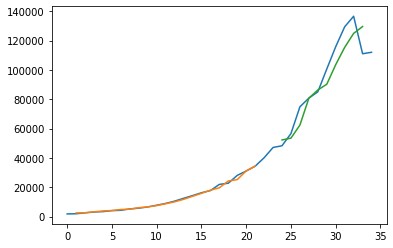

In [ ]:

# shift train predictions for plotting
trainPredictPlot = np.empty_like(frame)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(frame)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(frame)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(frame))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
last_val = testPredict[-1]
last_val_scaled = last_val/last_val
next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
print("Last Value:", np.asscalar(last_val))
print("Next Value:", np.asscalar(last_val*next_val))
# print np.append(last_val, next_val)

Last Value: 129596.7734375
Next Value: 122835.640625


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """


In [ ]:
files = glob.glob('ML_DL_project_final/PROCESSED/*.csv')

In [ ]:
files = list(filter(lambda str: 'Nominal_GSDP_Series' not in str, files))
files

['ML_DL_project_final/PROCESSED/Fiscal_Deficits.csv',
 'ML_DL_project_final/PROCESSED/Own_Tax_Revenues.csv',
 'ML_DL_project_final/PROCESSED/Outstanding_Liabilities.csv',
 'ML_DL_project_final/PROCESSED/Capital_Receipts.csv',
 'ML_DL_project_final/PROCESSED/Revenue_Expenditure.csv',
 'ML_DL_project_final/PROCESSED/Aggregate_Expenditure.csv',
 'ML_DL_project_final/PROCESSED/Revenue_Deficits.csv',
 'ML_DL_project_final/PROCESSED/Capital_Expenditure.csv',
 'ML_DL_project_final/PROCESSED/Revenue_Receipts.csv',
 'ML_DL_project_final/PROCESSED/Social_Sector_Expenditure.csv',
 'ML_DL_project_final/PROCESSED/Aggregate_Receipts.csv',
 'ML_DL_project_final/PROCESSED/Interest_Payments.csv']

In [ ]:
read_files = { os.path.splitext(os.path.basename(file_path))[0] : pd.read_csv(file_path, index_col='State') for file_path in files}

In [ ]:
file_names = [os.path.splitext(os.path.basename(file_path))[0] for file_path in files]
file_names

['Fiscal_Deficits',
 'Own_Tax_Revenues',
 'Outstanding_Liabilities',
 'Capital_Receipts',
 'Revenue_Expenditure',
 'Aggregate_Expenditure',
 'Revenue_Deficits',
 'Capital_Expenditure',
 'Revenue_Receipts',
 'Social_Sector_Expenditure',
 'Aggregate_Receipts',
 'Interest_Payments']

In [ ]:
states = read_files['Capital_Receipts'].index
states

Index(['Andhra Pradesh ', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'All States', 'Delhi',
       'Puducherry'],
      dtype='object', name='State')

In [ ]:
frame = (read_files['Capital_Receipts'])

In [ ]:
final_frame = pd.DataFrame(columns=file_names)
for idx, state in enumerate(states):
    state_data = []
    for feature, frame in read_files.items():
        years = list(map(lambda str: str.split('-')[0], frame.columns.values[1:]))
        years = pd.to_datetime(years, format='%Y')
        frame = pd.DataFrame({'Year':years, feature:frame.iloc[idx, :].values[1:]}, index=years)
        frame.dropna(inplace=True)
        try:
            #MinMax Scale
            scaler = MinMaxScaler(feature_range=(0, 1))
            frame = scaler.fit_transform(frame['Aggregate_Expenditure'].values.reshape(-1, 1))

            #train test
            train_size = int(len(frame) * 0.67)
            test_size = len(frame) - train_size
            train, test = frame[0:train_size,:], frame[train_size:len(frame),:]
            print(len(train), len(test))
        
            #creating dataset
            look_back = 1
            trainX, trainY = create_dataset(train, look_back)
            testX, testY = create_dataset(test, look_back)

            #reshaping
            trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
            testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

            #model
            model = Sequential()
            model.add(LSTM(4, input_shape=(1, look_back)))
            model.add(Dense(1))
            model.compile(loss='mean_squared_error', optimizer='adam')
            model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

            #prediction
            trainPredict = model.predict(trainX)
            testPredict = model.predict(testX)

            # invert predictions
            trainPredict = scaler.inverse_transform(trainPredict)
            trainY = scaler.inverse_transform([trainY])
            testPredict = scaler.inverse_transform(testPredict)
            testY = scaler.inverse_transform([testY])

            #prediction future
            last_val = testPredict[-1]
            last_val_scaled = last_val/last_val
            next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
            # print("Last Value:", np.asscalar(last_val))
            # print("Next Value:", np.asscalar(last_val*next_val))
            pred_val = np.asscalar(last_val*next_val)
        except:
            # print('State : {} Feature : {} Data : {}'.format(state, feature, frame[feature]))
            pass
        state_data.append(pred_val)
    # print('State : {}, Data : {}'.format(state, state_data))
    final_frame.loc[state] = state_data

23 12
Epoch 1/100
21/21 - 2s - loss: 0.0078
Epoch 2/100
21/21 - 0s - loss: 0.0057
Epoch 3/100
21/21 - 0s - loss: 0.0046
Epoch 4/100
21/21 - 0s - loss: 0.0041
Epoch 5/100
21/21 - 0s - loss: 0.0039
Epoch 6/100
21/21 - 0s - loss: 0.0038
Epoch 7/100
21/21 - 0s - loss: 0.0037
Epoch 8/100
21/21 - 0s - loss: 0.0037
Epoch 9/100
21/21 - 0s - loss: 0.0036
Epoch 10/100
21/21 - 0s - loss: 0.0035
Epoch 11/100
21/21 - 0s - loss: 0.0035
Epoch 12/100
21/21 - 0s - loss: 0.0034
Epoch 13/100
21/21 - 0s - loss: 0.0034
Epoch 14/100
21/21 - 0s - loss: 0.0033
Epoch 15/100
21/21 - 0s - loss: 0.0032
Epoch 16/100
21/21 - 0s - loss: 0.0032
Epoch 17/100
21/21 - 0s - loss: 0.0031
Epoch 18/100
21/21 - 0s - loss: 0.0030
Epoch 19/100
21/21 - 0s - loss: 0.0030
Epoch 20/100
21/21 - 0s - loss: 0.0029
Epoch 21/100
21/21 - 0s - loss: 0.0028
Epoch 22/100
21/21 - 0s - loss: 0.0028
Epoch 23/100
21/21 - 0s - loss: 0.0027
Epoch 24/100
21/21 - 0s - loss: 0.0026
Epoch 25/100
21/21 - 0s - loss: 0.0025
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


20 10
Epoch 1/100
18/18 - 2s - loss: 0.0032
Epoch 2/100
18/18 - 0s - loss: 0.0021
Epoch 3/100
18/18 - 0s - loss: 0.0016
Epoch 4/100
18/18 - 0s - loss: 0.0016
Epoch 5/100
18/18 - 0s - loss: 0.0016
Epoch 6/100
18/18 - 0s - loss: 0.0015
Epoch 7/100
18/18 - 0s - loss: 0.0015
Epoch 8/100
18/18 - 0s - loss: 0.0015
Epoch 9/100
18/18 - 0s - loss: 0.0015
Epoch 10/100
18/18 - 0s - loss: 0.0015
Epoch 11/100
18/18 - 0s - loss: 0.0015
Epoch 12/100
18/18 - 0s - loss: 0.0014
Epoch 13/100
18/18 - 0s - loss: 0.0014
Epoch 14/100
18/18 - 0s - loss: 0.0014
Epoch 15/100
18/18 - 0s - loss: 0.0014
Epoch 16/100
18/18 - 0s - loss: 0.0014
Epoch 17/100
18/18 - 0s - loss: 0.0014
Epoch 18/100
18/18 - 0s - loss: 0.0014
Epoch 19/100
18/18 - 0s - loss: 0.0014
Epoch 20/100
18/18 - 0s - loss: 0.0013
Epoch 21/100
18/18 - 0s - loss: 0.0013
Epoch 22/100
18/18 - 0s - loss: 0.0013
Epoch 23/100
18/18 - 0s - loss: 0.0013
Epoch 24/100
18/18 - 0s - loss: 0.0013
Epoch 25/100
18/18 - 0s - loss: 0.0012
Epoch 26/100
18/18 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0023
Epoch 2/100
21/21 - 0s - loss: 0.0015
Epoch 3/100
21/21 - 0s - loss: 0.0012
Epoch 4/100
21/21 - 0s - loss: 0.0011
Epoch 5/100
21/21 - 0s - loss: 0.0012
Epoch 6/100
21/21 - 0s - loss: 0.0011
Epoch 7/100
21/21 - 0s - loss: 0.0011
Epoch 8/100
21/21 - 0s - loss: 0.0011
Epoch 9/100
21/21 - 0s - loss: 0.0011
Epoch 10/100
21/21 - 0s - loss: 0.0010
Epoch 11/100
21/21 - 0s - loss: 0.0010
Epoch 12/100
21/21 - 0s - loss: 0.0010
Epoch 13/100
21/21 - 0s - loss: 0.0010
Epoch 14/100
21/21 - 0s - loss: 0.0010
Epoch 15/100
21/21 - 0s - loss: 9.5910e-04
Epoch 16/100
21/21 - 0s - loss: 9.4779e-04
Epoch 17/100
21/21 - 0s - loss: 9.2996e-04
Epoch 18/100
21/21 - 0s - loss: 9.4374e-04
Epoch 19/100
21/21 - 0s - loss: 9.4238e-04
Epoch 20/100
21/21 - 0s - loss: 8.5310e-04
Epoch 21/100
21/21 - 0s - loss: 8.5096e-04
Epoch 22/100
21/21 - 0s - loss: 8.2340e-04
Epoch 23/100
21/21 - 0s - loss: 8.0848e-04
Epoch 24/100
21/21 - 0s - loss: 7.8036e-04
Epoch 25/100
21/21 - 0s - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0023
Epoch 2/100
21/21 - 0s - loss: 0.0014
Epoch 3/100
21/21 - 0s - loss: 0.0012
Epoch 4/100
21/21 - 0s - loss: 0.0012
Epoch 5/100
21/21 - 0s - loss: 0.0012
Epoch 6/100
21/21 - 0s - loss: 0.0011
Epoch 7/100
21/21 - 0s - loss: 0.0011
Epoch 8/100
21/21 - 0s - loss: 0.0011
Epoch 9/100
21/21 - 0s - loss: 0.0011
Epoch 10/100
21/21 - 0s - loss: 0.0010
Epoch 11/100
21/21 - 0s - loss: 0.0011
Epoch 12/100
21/21 - 0s - loss: 0.0010
Epoch 13/100
21/21 - 0s - loss: 0.0010
Epoch 14/100
21/21 - 0s - loss: 9.6799e-04
Epoch 15/100
21/21 - 0s - loss: 9.6067e-04
Epoch 16/100
21/21 - 0s - loss: 9.4831e-04
Epoch 17/100
21/21 - 0s - loss: 9.2154e-04
Epoch 18/100
21/21 - 0s - loss: 8.8469e-04
Epoch 19/100
21/21 - 0s - loss: 8.7597e-04
Epoch 20/100
21/21 - 0s - loss: 8.4855e-04
Epoch 21/100
21/21 - 0s - loss: 8.4083e-04
Epoch 22/100
21/21 - 0s - loss: 7.9889e-04
Epoch 23/100
21/21 - 0s - loss: 8.0153e-04
Epoch 24/100
21/21 - 0s - loss: 7.5470e-04
Epoch 25/100
21/21 - 0s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


10 6
Epoch 1/100
8/8 - 2s - loss: 0.0220
Epoch 2/100
8/8 - 0s - loss: 0.0190
Epoch 3/100
8/8 - 0s - loss: 0.0159
Epoch 4/100
8/8 - 0s - loss: 0.0134
Epoch 5/100
8/8 - 0s - loss: 0.0113
Epoch 6/100
8/8 - 0s - loss: 0.0098
Epoch 7/100
8/8 - 0s - loss: 0.0082
Epoch 8/100
8/8 - 0s - loss: 0.0069
Epoch 9/100
8/8 - 0s - loss: 0.0061
Epoch 10/100
8/8 - 0s - loss: 0.0054
Epoch 11/100
8/8 - 0s - loss: 0.0048
Epoch 12/100
8/8 - 0s - loss: 0.0045
Epoch 13/100
8/8 - 0s - loss: 0.0041
Epoch 14/100
8/8 - 0s - loss: 0.0039
Epoch 15/100
8/8 - 0s - loss: 0.0036
Epoch 16/100
8/8 - 0s - loss: 0.0036
Epoch 17/100
8/8 - 0s - loss: 0.0035
Epoch 18/100
8/8 - 0s - loss: 0.0035
Epoch 19/100
8/8 - 0s - loss: 0.0034
Epoch 20/100
8/8 - 0s - loss: 0.0034
Epoch 21/100
8/8 - 0s - loss: 0.0034
Epoch 22/100
8/8 - 0s - loss: 0.0033
Epoch 23/100
8/8 - 0s - loss: 0.0033
Epoch 24/100
8/8 - 0s - loss: 0.0033
Epoch 25/100
8/8 - 0s - loss: 0.0033
Epoch 26/100
8/8 - 0s - loss: 0.0033
Epoch 27/100
8/8 - 0s - loss: 0.0032
Epoch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


20 10
Epoch 1/100
18/18 - 2s - loss: 0.0091
Epoch 2/100
18/18 - 0s - loss: 0.0071
Epoch 3/100
18/18 - 0s - loss: 0.0057
Epoch 4/100
18/18 - 0s - loss: 0.0050
Epoch 5/100
18/18 - 0s - loss: 0.0046
Epoch 6/100
18/18 - 0s - loss: 0.0044
Epoch 7/100
18/18 - 0s - loss: 0.0043
Epoch 8/100
18/18 - 0s - loss: 0.0043
Epoch 9/100
18/18 - 0s - loss: 0.0042
Epoch 10/100
18/18 - 0s - loss: 0.0041
Epoch 11/100
18/18 - 0s - loss: 0.0041
Epoch 12/100
18/18 - 0s - loss: 0.0041
Epoch 13/100
18/18 - 0s - loss: 0.0040
Epoch 14/100
18/18 - 0s - loss: 0.0040
Epoch 15/100
18/18 - 0s - loss: 0.0039
Epoch 16/100
18/18 - 0s - loss: 0.0039
Epoch 17/100
18/18 - 0s - loss: 0.0039
Epoch 18/100
18/18 - 0s - loss: 0.0038
Epoch 19/100
18/18 - 0s - loss: 0.0038
Epoch 20/100
18/18 - 0s - loss: 0.0037
Epoch 21/100
18/18 - 0s - loss: 0.0037
Epoch 22/100
18/18 - 0s - loss: 0.0037
Epoch 23/100
18/18 - 0s - loss: 0.0036
Epoch 24/100
18/18 - 0s - loss: 0.0036
Epoch 25/100
18/18 - 0s - loss: 0.0035
Epoch 26/100
18/18 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0076
Epoch 2/100
21/21 - 0s - loss: 0.0057
Epoch 3/100
21/21 - 0s - loss: 0.0048
Epoch 4/100
21/21 - 0s - loss: 0.0044
Epoch 5/100
21/21 - 0s - loss: 0.0043
Epoch 6/100
21/21 - 0s - loss: 0.0041
Epoch 7/100
21/21 - 0s - loss: 0.0041
Epoch 8/100
21/21 - 0s - loss: 0.0040
Epoch 9/100
21/21 - 0s - loss: 0.0041
Epoch 10/100
21/21 - 0s - loss: 0.0039
Epoch 11/100
21/21 - 0s - loss: 0.0038
Epoch 12/100
21/21 - 0s - loss: 0.0038
Epoch 13/100
21/21 - 0s - loss: 0.0038
Epoch 14/100
21/21 - 0s - loss: 0.0037
Epoch 15/100
21/21 - 0s - loss: 0.0036
Epoch 16/100
21/21 - 0s - loss: 0.0036
Epoch 17/100
21/21 - 0s - loss: 0.0036
Epoch 18/100
21/21 - 0s - loss: 0.0036
Epoch 19/100
21/21 - 0s - loss: 0.0035
Epoch 20/100
21/21 - 0s - loss: 0.0034
Epoch 21/100
21/21 - 0s - loss: 0.0034
Epoch 22/100
21/21 - 0s - loss: 0.0033
Epoch 23/100
21/21 - 0s - loss: 0.0033
Epoch 24/100
21/21 - 0s - loss: 0.0033
Epoch 25/100
21/21 - 0s - loss: 0.0032
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0045
Epoch 2/100
21/21 - 0s - loss: 0.0029
Epoch 3/100
21/21 - 0s - loss: 0.0025
Epoch 4/100
21/21 - 0s - loss: 0.0022
Epoch 5/100
21/21 - 0s - loss: 0.0022
Epoch 6/100
21/21 - 0s - loss: 0.0021
Epoch 7/100
21/21 - 0s - loss: 0.0021
Epoch 8/100
21/21 - 0s - loss: 0.0021
Epoch 9/100
21/21 - 0s - loss: 0.0021
Epoch 10/100
21/21 - 0s - loss: 0.0020
Epoch 11/100
21/21 - 0s - loss: 0.0020
Epoch 12/100
21/21 - 0s - loss: 0.0020
Epoch 13/100
21/21 - 0s - loss: 0.0019
Epoch 14/100
21/21 - 0s - loss: 0.0019
Epoch 15/100
21/21 - 0s - loss: 0.0019
Epoch 16/100
21/21 - 0s - loss: 0.0019
Epoch 17/100
21/21 - 0s - loss: 0.0019
Epoch 18/100
21/21 - 0s - loss: 0.0018
Epoch 19/100
21/21 - 0s - loss: 0.0018
Epoch 20/100
21/21 - 0s - loss: 0.0018
Epoch 21/100
21/21 - 0s - loss: 0.0017
Epoch 22/100
21/21 - 0s - loss: 0.0017
Epoch 23/100
21/21 - 0s - loss: 0.0017
Epoch 24/100
21/21 - 0s - loss: 0.0016
Epoch 25/100
21/21 - 0s - loss: 0.0016
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0058
Epoch 2/100
21/21 - 0s - loss: 0.0043
Epoch 3/100
21/21 - 0s - loss: 0.0034
Epoch 4/100
21/21 - 0s - loss: 0.0033
Epoch 5/100
21/21 - 0s - loss: 0.0031
Epoch 6/100
21/21 - 0s - loss: 0.0031
Epoch 7/100
21/21 - 0s - loss: 0.0030
Epoch 8/100
21/21 - 0s - loss: 0.0029
Epoch 9/100
21/21 - 0s - loss: 0.0029
Epoch 10/100
21/21 - 0s - loss: 0.0028
Epoch 11/100
21/21 - 0s - loss: 0.0028
Epoch 12/100
21/21 - 0s - loss: 0.0027
Epoch 13/100
21/21 - 0s - loss: 0.0026
Epoch 14/100
21/21 - 0s - loss: 0.0026
Epoch 15/100
21/21 - 0s - loss: 0.0025
Epoch 16/100
21/21 - 0s - loss: 0.0025
Epoch 17/100
21/21 - 0s - loss: 0.0025
Epoch 18/100
21/21 - 0s - loss: 0.0023
Epoch 19/100
21/21 - 0s - loss: 0.0023
Epoch 20/100
21/21 - 0s - loss: 0.0022
Epoch 21/100
21/21 - 0s - loss: 0.0021
Epoch 22/100
21/21 - 0s - loss: 0.0020
Epoch 23/100
21/21 - 0s - loss: 0.0019
Epoch 24/100
21/21 - 0s - loss: 0.0019
Epoch 25/100
21/21 - 0s - loss: 0.0018
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0057
Epoch 2/100
21/21 - 0s - loss: 0.0040
Epoch 3/100
21/21 - 0s - loss: 0.0034
Epoch 4/100
21/21 - 0s - loss: 0.0032
Epoch 5/100
21/21 - 0s - loss: 0.0031
Epoch 6/100
21/21 - 0s - loss: 0.0030
Epoch 7/100
21/21 - 0s - loss: 0.0030
Epoch 8/100
21/21 - 0s - loss: 0.0029
Epoch 9/100
21/21 - 0s - loss: 0.0029
Epoch 10/100
21/21 - 0s - loss: 0.0029
Epoch 11/100
21/21 - 0s - loss: 0.0028
Epoch 12/100
21/21 - 0s - loss: 0.0028
Epoch 13/100
21/21 - 0s - loss: 0.0028
Epoch 14/100
21/21 - 0s - loss: 0.0027
Epoch 15/100
21/21 - 0s - loss: 0.0027
Epoch 16/100
21/21 - 0s - loss: 0.0027
Epoch 17/100
21/21 - 0s - loss: 0.0026
Epoch 18/100
21/21 - 0s - loss: 0.0026
Epoch 19/100
21/21 - 0s - loss: 0.0027
Epoch 20/100
21/21 - 0s - loss: 0.0025
Epoch 21/100
21/21 - 0s - loss: 0.0025
Epoch 22/100
21/21 - 0s - loss: 0.0025
Epoch 23/100
21/21 - 0s - loss: 0.0024
Epoch 24/100
21/21 - 0s - loss: 0.0024
Epoch 25/100
21/21 - 0s - loss: 0.0024
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


10 5
Epoch 1/100
8/8 - 2s - loss: 0.0281
Epoch 2/100
8/8 - 0s - loss: 0.0242
Epoch 3/100
8/8 - 0s - loss: 0.0212
Epoch 4/100
8/8 - 0s - loss: 0.0190
Epoch 5/100
8/8 - 0s - loss: 0.0169
Epoch 6/100
8/8 - 0s - loss: 0.0144
Epoch 7/100
8/8 - 0s - loss: 0.0129
Epoch 8/100
8/8 - 0s - loss: 0.0118
Epoch 9/100
8/8 - 0s - loss: 0.0106
Epoch 10/100
8/8 - 0s - loss: 0.0100
Epoch 11/100
8/8 - 0s - loss: 0.0091
Epoch 12/100
8/8 - 0s - loss: 0.0087
Epoch 13/100
8/8 - 0s - loss: 0.0082
Epoch 14/100
8/8 - 0s - loss: 0.0080
Epoch 15/100
8/8 - 0s - loss: 0.0077
Epoch 16/100
8/8 - 0s - loss: 0.0075
Epoch 17/100
8/8 - 0s - loss: 0.0075
Epoch 18/100
8/8 - 0s - loss: 0.0072
Epoch 19/100
8/8 - 0s - loss: 0.0071
Epoch 20/100
8/8 - 0s - loss: 0.0070
Epoch 21/100
8/8 - 0s - loss: 0.0069
Epoch 22/100
8/8 - 0s - loss: 0.0069
Epoch 23/100
8/8 - 0s - loss: 0.0069
Epoch 24/100
8/8 - 0s - loss: 0.0067
Epoch 25/100
8/8 - 0s - loss: 0.0067
Epoch 26/100
8/8 - 0s - loss: 0.0066
Epoch 27/100
8/8 - 0s - loss: 0.0066
Epoch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0042
Epoch 2/100
21/21 - 0s - loss: 0.0028
Epoch 3/100
21/21 - 0s - loss: 0.0024
Epoch 4/100
21/21 - 0s - loss: 0.0022
Epoch 5/100
21/21 - 0s - loss: 0.0021
Epoch 6/100
21/21 - 0s - loss: 0.0021
Epoch 7/100
21/21 - 0s - loss: 0.0021
Epoch 8/100
21/21 - 0s - loss: 0.0021
Epoch 9/100
21/21 - 0s - loss: 0.0021
Epoch 10/100
21/21 - 0s - loss: 0.0020
Epoch 11/100
21/21 - 0s - loss: 0.0020
Epoch 12/100
21/21 - 0s - loss: 0.0020
Epoch 13/100
21/21 - 0s - loss: 0.0019
Epoch 14/100
21/21 - 0s - loss: 0.0019
Epoch 15/100
21/21 - 0s - loss: 0.0019
Epoch 16/100
21/21 - 0s - loss: 0.0019
Epoch 17/100
21/21 - 0s - loss: 0.0018
Epoch 18/100
21/21 - 0s - loss: 0.0018
Epoch 19/100
21/21 - 0s - loss: 0.0017
Epoch 20/100
21/21 - 0s - loss: 0.0017
Epoch 21/100
21/21 - 0s - loss: 0.0017
Epoch 22/100
21/21 - 0s - loss: 0.0017
Epoch 23/100
21/21 - 0s - loss: 0.0016
Epoch 24/100
21/21 - 0s - loss: 0.0016
Epoch 25/100
21/21 - 0s - loss: 0.0016
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0023
Epoch 2/100
21/21 - 0s - loss: 0.0016
Epoch 3/100
21/21 - 0s - loss: 0.0014
Epoch 4/100
21/21 - 0s - loss: 0.0013
Epoch 5/100
21/21 - 0s - loss: 0.0013
Epoch 6/100
21/21 - 0s - loss: 0.0013
Epoch 7/100
21/21 - 0s - loss: 0.0012
Epoch 8/100
21/21 - 0s - loss: 0.0012
Epoch 9/100
21/21 - 0s - loss: 0.0012
Epoch 10/100
21/21 - 0s - loss: 0.0012
Epoch 11/100
21/21 - 0s - loss: 0.0011
Epoch 12/100
21/21 - 0s - loss: 0.0011
Epoch 13/100
21/21 - 0s - loss: 0.0010
Epoch 14/100
21/21 - 0s - loss: 0.0010
Epoch 15/100
21/21 - 0s - loss: 9.6782e-04
Epoch 16/100
21/21 - 0s - loss: 9.5003e-04
Epoch 17/100
21/21 - 0s - loss: 8.9592e-04
Epoch 18/100
21/21 - 0s - loss: 8.8079e-04
Epoch 19/100
21/21 - 0s - loss: 8.3655e-04
Epoch 20/100
21/21 - 0s - loss: 8.1169e-04
Epoch 21/100
21/21 - 0s - loss: 7.7520e-04
Epoch 22/100
21/21 - 0s - loss: 7.5255e-04
Epoch 23/100
21/21 - 0s - loss: 6.9007e-04
Epoch 24/100
21/21 - 0s - loss: 6.7424e-04
Epoch 25/100
21/21 - 0s - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0043
Epoch 2/100
21/21 - 0s - loss: 0.0027
Epoch 3/100
21/21 - 0s - loss: 0.0024
Epoch 4/100
21/21 - 0s - loss: 0.0022
Epoch 5/100
21/21 - 0s - loss: 0.0022
Epoch 6/100
21/21 - 0s - loss: 0.0022
Epoch 7/100
21/21 - 0s - loss: 0.0022
Epoch 8/100
21/21 - 0s - loss: 0.0022
Epoch 9/100
21/21 - 0s - loss: 0.0021
Epoch 10/100
21/21 - 0s - loss: 0.0021
Epoch 11/100
21/21 - 0s - loss: 0.0021
Epoch 12/100
21/21 - 0s - loss: 0.0020
Epoch 13/100
21/21 - 0s - loss: 0.0020
Epoch 14/100
21/21 - 0s - loss: 0.0020
Epoch 15/100
21/21 - 0s - loss: 0.0020
Epoch 16/100
21/21 - 0s - loss: 0.0019
Epoch 17/100
21/21 - 0s - loss: 0.0019
Epoch 18/100
21/21 - 0s - loss: 0.0019
Epoch 19/100
21/21 - 0s - loss: 0.0019
Epoch 20/100
21/21 - 0s - loss: 0.0019
Epoch 21/100
21/21 - 0s - loss: 0.0018
Epoch 22/100
21/21 - 0s - loss: 0.0019
Epoch 23/100
21/21 - 0s - loss: 0.0018
Epoch 24/100
21/21 - 0s - loss: 0.0018
Epoch 25/100
21/21 - 0s - loss: 0.0018
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0065
Epoch 2/100
21/21 - 0s - loss: 0.0046
Epoch 3/100
21/21 - 0s - loss: 0.0040
Epoch 4/100
21/21 - 0s - loss: 0.0035
Epoch 5/100
21/21 - 0s - loss: 0.0034
Epoch 6/100
21/21 - 0s - loss: 0.0033
Epoch 7/100
21/21 - 0s - loss: 0.0033
Epoch 8/100
21/21 - 0s - loss: 0.0033
Epoch 9/100
21/21 - 0s - loss: 0.0032
Epoch 10/100
21/21 - 0s - loss: 0.0032
Epoch 11/100
21/21 - 0s - loss: 0.0031
Epoch 12/100
21/21 - 0s - loss: 0.0031
Epoch 13/100
21/21 - 0s - loss: 0.0031
Epoch 14/100
21/21 - 0s - loss: 0.0030
Epoch 15/100
21/21 - 0s - loss: 0.0030
Epoch 16/100
21/21 - 0s - loss: 0.0030
Epoch 17/100
21/21 - 0s - loss: 0.0029
Epoch 18/100
21/21 - 0s - loss: 0.0029
Epoch 19/100
21/21 - 0s - loss: 0.0029
Epoch 20/100
21/21 - 0s - loss: 0.0028
Epoch 21/100
21/21 - 0s - loss: 0.0028
Epoch 22/100
21/21 - 0s - loss: 0.0027
Epoch 23/100
21/21 - 0s - loss: 0.0027
Epoch 24/100
21/21 - 0s - loss: 0.0026
Epoch 25/100
21/21 - 0s - loss: 0.0026
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0054
Epoch 2/100
21/21 - 0s - loss: 0.0037
Epoch 3/100
21/21 - 0s - loss: 0.0031
Epoch 4/100
21/21 - 0s - loss: 0.0029
Epoch 5/100
21/21 - 0s - loss: 0.0029
Epoch 6/100
21/21 - 0s - loss: 0.0028
Epoch 7/100
21/21 - 0s - loss: 0.0028
Epoch 8/100
21/21 - 0s - loss: 0.0028
Epoch 9/100
21/21 - 0s - loss: 0.0027
Epoch 10/100
21/21 - 0s - loss: 0.0027
Epoch 11/100
21/21 - 0s - loss: 0.0026
Epoch 12/100
21/21 - 0s - loss: 0.0026
Epoch 13/100
21/21 - 0s - loss: 0.0026
Epoch 14/100
21/21 - 0s - loss: 0.0025
Epoch 15/100
21/21 - 0s - loss: 0.0025
Epoch 16/100
21/21 - 0s - loss: 0.0024
Epoch 17/100
21/21 - 0s - loss: 0.0024
Epoch 18/100
21/21 - 0s - loss: 0.0024
Epoch 19/100
21/21 - 0s - loss: 0.0023
Epoch 20/100
21/21 - 0s - loss: 0.0023
Epoch 21/100
21/21 - 0s - loss: 0.0022
Epoch 22/100
21/21 - 0s - loss: 0.0023
Epoch 23/100
21/21 - 0s - loss: 0.0022
Epoch 24/100
21/21 - 0s - loss: 0.0021
Epoch 25/100
21/21 - 0s - loss: 0.0021
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0032
Epoch 2/100
21/21 - 0s - loss: 0.0020
Epoch 3/100
21/21 - 0s - loss: 0.0017
Epoch 4/100
21/21 - 0s - loss: 0.0016
Epoch 5/100
21/21 - 0s - loss: 0.0016
Epoch 6/100
21/21 - 0s - loss: 0.0016
Epoch 7/100
21/21 - 0s - loss: 0.0015
Epoch 8/100
21/21 - 0s - loss: 0.0015
Epoch 9/100
21/21 - 0s - loss: 0.0015
Epoch 10/100
21/21 - 0s - loss: 0.0015
Epoch 11/100
21/21 - 0s - loss: 0.0015
Epoch 12/100
21/21 - 0s - loss: 0.0015
Epoch 13/100
21/21 - 0s - loss: 0.0015
Epoch 14/100
21/21 - 0s - loss: 0.0014
Epoch 15/100
21/21 - 0s - loss: 0.0014
Epoch 16/100
21/21 - 0s - loss: 0.0014
Epoch 17/100
21/21 - 0s - loss: 0.0014
Epoch 18/100
21/21 - 0s - loss: 0.0014
Epoch 19/100
21/21 - 0s - loss: 0.0014
Epoch 20/100
21/21 - 0s - loss: 0.0013
Epoch 21/100
21/21 - 0s - loss: 0.0013
Epoch 22/100
21/21 - 0s - loss: 0.0013
Epoch 23/100
21/21 - 0s - loss: 0.0013
Epoch 24/100
21/21 - 0s - loss: 0.0013
Epoch 25/100
21/21 - 0s - loss: 0.0013
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


20 11
Epoch 1/100
18/18 - 2s - loss: 0.0106
Epoch 2/100
18/18 - 0s - loss: 0.0066
Epoch 3/100
18/18 - 0s - loss: 0.0047
Epoch 4/100
18/18 - 0s - loss: 0.0040
Epoch 5/100
18/18 - 0s - loss: 0.0036
Epoch 6/100
18/18 - 0s - loss: 0.0034
Epoch 7/100
18/18 - 0s - loss: 0.0034
Epoch 8/100
18/18 - 0s - loss: 0.0033
Epoch 9/100
18/18 - 0s - loss: 0.0033
Epoch 10/100
18/18 - 0s - loss: 0.0033
Epoch 11/100
18/18 - 0s - loss: 0.0032
Epoch 12/100
18/18 - 0s - loss: 0.0031
Epoch 13/100
18/18 - 0s - loss: 0.0031
Epoch 14/100
18/18 - 0s - loss: 0.0031
Epoch 15/100
18/18 - 0s - loss: 0.0030
Epoch 16/100
18/18 - 0s - loss: 0.0030
Epoch 17/100
18/18 - 0s - loss: 0.0030
Epoch 18/100
18/18 - 0s - loss: 0.0029
Epoch 19/100
18/18 - 0s - loss: 0.0028
Epoch 20/100
18/18 - 0s - loss: 0.0028
Epoch 21/100
18/18 - 0s - loss: 0.0028
Epoch 22/100
18/18 - 0s - loss: 0.0027
Epoch 23/100
18/18 - 0s - loss: 0.0027
Epoch 24/100
18/18 - 0s - loss: 0.0026
Epoch 25/100
18/18 - 0s - loss: 0.0026
Epoch 26/100
18/18 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0063
Epoch 2/100
21/21 - 0s - loss: 0.0039
Epoch 3/100
21/21 - 0s - loss: 0.0031
Epoch 4/100
21/21 - 0s - loss: 0.0028
Epoch 5/100
21/21 - 0s - loss: 0.0027
Epoch 6/100
21/21 - 0s - loss: 0.0026
Epoch 7/100
21/21 - 0s - loss: 0.0026
Epoch 8/100
21/21 - 0s - loss: 0.0025
Epoch 9/100
21/21 - 0s - loss: 0.0025
Epoch 10/100
21/21 - 0s - loss: 0.0024
Epoch 11/100
21/21 - 0s - loss: 0.0024
Epoch 12/100
21/21 - 0s - loss: 0.0024
Epoch 13/100
21/21 - 0s - loss: 0.0022
Epoch 14/100
21/21 - 0s - loss: 0.0022
Epoch 15/100
21/21 - 0s - loss: 0.0022
Epoch 16/100
21/21 - 0s - loss: 0.0021
Epoch 17/100
21/21 - 0s - loss: 0.0021
Epoch 18/100
21/21 - 0s - loss: 0.0020
Epoch 19/100
21/21 - 0s - loss: 0.0019
Epoch 20/100
21/21 - 0s - loss: 0.0019
Epoch 21/100
21/21 - 0s - loss: 0.0018
Epoch 22/100
21/21 - 0s - loss: 0.0018
Epoch 23/100
21/21 - 0s - loss: 0.0017
Epoch 24/100
21/21 - 0s - loss: 0.0017
Epoch 25/100
21/21 - 0s - loss: 0.0016
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0047
Epoch 2/100
21/21 - 0s - loss: 0.0033
Epoch 3/100
21/21 - 0s - loss: 0.0028
Epoch 4/100
21/21 - 0s - loss: 0.0026
Epoch 5/100
21/21 - 0s - loss: 0.0025
Epoch 6/100
21/21 - 0s - loss: 0.0025
Epoch 7/100
21/21 - 0s - loss: 0.0025
Epoch 8/100
21/21 - 0s - loss: 0.0025
Epoch 9/100
21/21 - 0s - loss: 0.0024
Epoch 10/100
21/21 - 0s - loss: 0.0024
Epoch 11/100
21/21 - 0s - loss: 0.0024
Epoch 12/100
21/21 - 0s - loss: 0.0024
Epoch 13/100
21/21 - 0s - loss: 0.0023
Epoch 14/100
21/21 - 0s - loss: 0.0023
Epoch 15/100
21/21 - 0s - loss: 0.0023
Epoch 16/100
21/21 - 0s - loss: 0.0023
Epoch 17/100
21/21 - 0s - loss: 0.0022
Epoch 18/100
21/21 - 0s - loss: 0.0022
Epoch 19/100
21/21 - 0s - loss: 0.0022
Epoch 20/100
21/21 - 0s - loss: 0.0022
Epoch 21/100
21/21 - 0s - loss: 0.0022
Epoch 22/100
21/21 - 0s - loss: 0.0021
Epoch 23/100
21/21 - 0s - loss: 0.0021
Epoch 24/100
21/21 - 0s - loss: 0.0021
Epoch 25/100
21/21 - 0s - loss: 0.0021
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0117
Epoch 2/100
21/21 - 0s - loss: 0.0087
Epoch 3/100
21/21 - 0s - loss: 0.0069
Epoch 4/100
21/21 - 0s - loss: 0.0061
Epoch 5/100
21/21 - 0s - loss: 0.0056
Epoch 6/100
21/21 - 0s - loss: 0.0054
Epoch 7/100
21/21 - 0s - loss: 0.0054
Epoch 8/100
21/21 - 0s - loss: 0.0051
Epoch 9/100
21/21 - 0s - loss: 0.0051
Epoch 10/100
21/21 - 0s - loss: 0.0050
Epoch 11/100
21/21 - 0s - loss: 0.0049
Epoch 12/100
21/21 - 0s - loss: 0.0049
Epoch 13/100
21/21 - 0s - loss: 0.0047
Epoch 14/100
21/21 - 0s - loss: 0.0048
Epoch 15/100
21/21 - 0s - loss: 0.0046
Epoch 16/100
21/21 - 0s - loss: 0.0045
Epoch 17/100
21/21 - 0s - loss: 0.0046
Epoch 18/100
21/21 - 0s - loss: 0.0043
Epoch 19/100
21/21 - 0s - loss: 0.0043
Epoch 20/100
21/21 - 0s - loss: 0.0042
Epoch 21/100
21/21 - 0s - loss: 0.0041
Epoch 22/100
21/21 - 0s - loss: 0.0040
Epoch 23/100
21/21 - 0s - loss: 0.0039
Epoch 24/100
21/21 - 0s - loss: 0.0038
Epoch 25/100
21/21 - 0s - loss: 0.0037
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0042
Epoch 2/100
21/21 - 0s - loss: 0.0027
Epoch 3/100
21/21 - 0s - loss: 0.0024
Epoch 4/100
21/21 - 0s - loss: 0.0023
Epoch 5/100
21/21 - 0s - loss: 0.0023
Epoch 6/100
21/21 - 0s - loss: 0.0022
Epoch 7/100
21/21 - 0s - loss: 0.0021
Epoch 8/100
21/21 - 0s - loss: 0.0022
Epoch 9/100
21/21 - 0s - loss: 0.0021
Epoch 10/100
21/21 - 0s - loss: 0.0021
Epoch 11/100
21/21 - 0s - loss: 0.0020
Epoch 12/100
21/21 - 0s - loss: 0.0020
Epoch 13/100
21/21 - 0s - loss: 0.0020
Epoch 14/100
21/21 - 0s - loss: 0.0020
Epoch 15/100
21/21 - 0s - loss: 0.0020
Epoch 16/100
21/21 - 0s - loss: 0.0019
Epoch 17/100
21/21 - 0s - loss: 0.0019
Epoch 18/100
21/21 - 0s - loss: 0.0019
Epoch 19/100
21/21 - 0s - loss: 0.0018
Epoch 20/100
21/21 - 0s - loss: 0.0018
Epoch 21/100
21/21 - 0s - loss: 0.0018
Epoch 22/100
21/21 - 0s - loss: 0.0017
Epoch 23/100
21/21 - 0s - loss: 0.0017
Epoch 24/100
21/21 - 0s - loss: 0.0017
Epoch 25/100
21/21 - 0s - loss: 0.0017
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0183
Epoch 2/100
21/21 - 0s - loss: 0.0149
Epoch 3/100
21/21 - 0s - loss: 0.0128
Epoch 4/100
21/21 - 0s - loss: 0.0114
Epoch 5/100
21/21 - 0s - loss: 0.0109
Epoch 6/100
21/21 - 0s - loss: 0.0103
Epoch 7/100
21/21 - 0s - loss: 0.0101
Epoch 8/100
21/21 - 0s - loss: 0.0101
Epoch 9/100
21/21 - 0s - loss: 0.0098
Epoch 10/100
21/21 - 0s - loss: 0.0096
Epoch 11/100
21/21 - 0s - loss: 0.0094
Epoch 12/100
21/21 - 0s - loss: 0.0093
Epoch 13/100
21/21 - 0s - loss: 0.0093
Epoch 14/100
21/21 - 0s - loss: 0.0091
Epoch 15/100
21/21 - 0s - loss: 0.0088
Epoch 16/100
21/21 - 0s - loss: 0.0087
Epoch 17/100
21/21 - 0s - loss: 0.0087
Epoch 18/100
21/21 - 0s - loss: 0.0083
Epoch 19/100
21/21 - 0s - loss: 0.0083
Epoch 20/100
21/21 - 0s - loss: 0.0083
Epoch 21/100
21/21 - 0s - loss: 0.0079
Epoch 22/100
21/21 - 0s - loss: 0.0077
Epoch 23/100
21/21 - 0s - loss: 0.0076
Epoch 24/100
21/21 - 0s - loss: 0.0074
Epoch 25/100
21/21 - 0s - loss: 0.0073
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0019
Epoch 2/100
21/21 - 0s - loss: 0.0011
Epoch 3/100
21/21 - 0s - loss: 0.0010
Epoch 4/100
21/21 - 0s - loss: 9.8210e-04
Epoch 5/100
21/21 - 0s - loss: 0.0010
Epoch 6/100
21/21 - 0s - loss: 9.5422e-04
Epoch 7/100
21/21 - 0s - loss: 9.0107e-04
Epoch 8/100
21/21 - 0s - loss: 8.6835e-04
Epoch 9/100
21/21 - 0s - loss: 8.4670e-04
Epoch 10/100
21/21 - 0s - loss: 8.3653e-04
Epoch 11/100
21/21 - 0s - loss: 7.9866e-04
Epoch 12/100
21/21 - 0s - loss: 7.4073e-04
Epoch 13/100
21/21 - 0s - loss: 7.4386e-04
Epoch 14/100
21/21 - 0s - loss: 6.8900e-04
Epoch 15/100
21/21 - 0s - loss: 6.6159e-04
Epoch 16/100
21/21 - 0s - loss: 6.3344e-04
Epoch 17/100
21/21 - 0s - loss: 5.8916e-04
Epoch 18/100
21/21 - 0s - loss: 5.9818e-04
Epoch 19/100
21/21 - 0s - loss: 5.6624e-04
Epoch 20/100
21/21 - 0s - loss: 5.0831e-04
Epoch 21/100
21/21 - 0s - loss: 5.2354e-04
Epoch 22/100
21/21 - 0s - loss: 4.8771e-04
Epoch 23/100
21/21 - 0s - loss: 4.5823e-04
Epoch 24/100
21/21 - 0s - loss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


1 1
23 12
Epoch 1/100
21/21 - 2s - loss: 0.0042
Epoch 2/100
21/21 - 0s - loss: 0.0027
Epoch 3/100
21/21 - 0s - loss: 0.0022
Epoch 4/100
21/21 - 0s - loss: 0.0021
Epoch 5/100
21/21 - 0s - loss: 0.0020
Epoch 6/100
21/21 - 0s - loss: 0.0020
Epoch 7/100
21/21 - 0s - loss: 0.0020
Epoch 8/100
21/21 - 0s - loss: 0.0020
Epoch 9/100
21/21 - 0s - loss: 0.0019
Epoch 10/100
21/21 - 0s - loss: 0.0019
Epoch 11/100
21/21 - 0s - loss: 0.0019
Epoch 12/100
21/21 - 0s - loss: 0.0018
Epoch 13/100
21/21 - 0s - loss: 0.0018
Epoch 14/100
21/21 - 0s - loss: 0.0018
Epoch 15/100
21/21 - 0s - loss: 0.0018
Epoch 16/100
21/21 - 0s - loss: 0.0018
Epoch 17/100
21/21 - 0s - loss: 0.0018
Epoch 18/100
21/21 - 0s - loss: 0.0017
Epoch 19/100
21/21 - 0s - loss: 0.0017
Epoch 20/100
21/21 - 0s - loss: 0.0016
Epoch 21/100
21/21 - 0s - loss: 0.0016
Epoch 22/100
21/21 - 0s - loss: 0.0016
Epoch 23/100
21/21 - 0s - loss: 0.0015
Epoch 24/100
21/21 - 0s - loss: 0.0015
Epoch 25/100
21/21 - 0s - loss: 0.0015
Epoch 26/100
21/21 - 0s 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0029
Epoch 2/100
21/21 - 0s - loss: 0.0019
Epoch 3/100
21/21 - 0s - loss: 0.0015
Epoch 4/100
21/21 - 0s - loss: 0.0014
Epoch 5/100
21/21 - 0s - loss: 0.0014
Epoch 6/100
21/21 - 0s - loss: 0.0013
Epoch 7/100
21/21 - 0s - loss: 0.0013
Epoch 8/100
21/21 - 0s - loss: 0.0013
Epoch 9/100
21/21 - 0s - loss: 0.0013
Epoch 10/100
21/21 - 0s - loss: 0.0013
Epoch 11/100
21/21 - 0s - loss: 0.0013
Epoch 12/100
21/21 - 0s - loss: 0.0012
Epoch 13/100
21/21 - 0s - loss: 0.0013
Epoch 14/100
21/21 - 0s - loss: 0.0012
Epoch 15/100
21/21 - 0s - loss: 0.0012
Epoch 16/100
21/21 - 0s - loss: 0.0011
Epoch 17/100
21/21 - 0s - loss: 0.0011
Epoch 18/100
21/21 - 0s - loss: 0.0011
Epoch 19/100
21/21 - 0s - loss: 0.0011
Epoch 20/100
21/21 - 0s - loss: 0.0011
Epoch 21/100
21/21 - 0s - loss: 0.0010
Epoch 22/100
21/21 - 0s - loss: 0.0010
Epoch 23/100
21/21 - 0s - loss: 9.9231e-04
Epoch 24/100
21/21 - 0s - loss: 9.7353e-04
Epoch 25/100
21/21 - 0s - loss: 9.5043e-04
Epoch 26/100
21/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


10 6
Epoch 1/100
8/8 - 2s - loss: 0.0429
Epoch 2/100
8/8 - 0s - loss: 0.0387
Epoch 3/100
8/8 - 0s - loss: 0.0346
Epoch 4/100
8/8 - 0s - loss: 0.0312
Epoch 5/100
8/8 - 0s - loss: 0.0277
Epoch 6/100
8/8 - 0s - loss: 0.0244
Epoch 7/100
8/8 - 0s - loss: 0.0219
Epoch 8/100
8/8 - 0s - loss: 0.0193
Epoch 9/100
8/8 - 0s - loss: 0.0174
Epoch 10/100
8/8 - 0s - loss: 0.0152
Epoch 11/100
8/8 - 0s - loss: 0.0135
Epoch 12/100
8/8 - 0s - loss: 0.0120
Epoch 13/100
8/8 - 0s - loss: 0.0105
Epoch 14/100
8/8 - 0s - loss: 0.0095
Epoch 15/100
8/8 - 0s - loss: 0.0085
Epoch 16/100
8/8 - 0s - loss: 0.0077
Epoch 17/100
8/8 - 0s - loss: 0.0072
Epoch 18/100
8/8 - 0s - loss: 0.0067
Epoch 19/100
8/8 - 0s - loss: 0.0061
Epoch 20/100
8/8 - 0s - loss: 0.0058
Epoch 21/100
8/8 - 0s - loss: 0.0055
Epoch 22/100
8/8 - 0s - loss: 0.0053
Epoch 23/100
8/8 - 0s - loss: 0.0051
Epoch 24/100
8/8 - 0s - loss: 0.0050
Epoch 25/100
8/8 - 0s - loss: 0.0049
Epoch 26/100
8/8 - 0s - loss: 0.0048
Epoch 27/100
8/8 - 0s - loss: 0.0047
Epoch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0061
Epoch 2/100
21/21 - 0s - loss: 0.0045
Epoch 3/100
21/21 - 0s - loss: 0.0039
Epoch 4/100
21/21 - 0s - loss: 0.0035
Epoch 5/100
21/21 - 0s - loss: 0.0033
Epoch 6/100
21/21 - 0s - loss: 0.0033
Epoch 7/100
21/21 - 0s - loss: 0.0032
Epoch 8/100
21/21 - 0s - loss: 0.0032
Epoch 9/100
21/21 - 0s - loss: 0.0031
Epoch 10/100
21/21 - 0s - loss: 0.0031
Epoch 11/100
21/21 - 0s - loss: 0.0030
Epoch 12/100
21/21 - 0s - loss: 0.0030
Epoch 13/100
21/21 - 0s - loss: 0.0029
Epoch 14/100
21/21 - 0s - loss: 0.0029
Epoch 15/100
21/21 - 0s - loss: 0.0028
Epoch 16/100
21/21 - 0s - loss: 0.0027
Epoch 17/100
21/21 - 0s - loss: 0.0027
Epoch 18/100
21/21 - 0s - loss: 0.0026
Epoch 19/100
21/21 - 0s - loss: 0.0025
Epoch 20/100
21/21 - 0s - loss: 0.0025
Epoch 21/100
21/21 - 0s - loss: 0.0023
Epoch 22/100
21/21 - 0s - loss: 0.0022
Epoch 23/100
21/21 - 0s - loss: 0.0022
Epoch 24/100
21/21 - 0s - loss: 0.0021
Epoch 25/100
21/21 - 0s - loss: 0.0020
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0046
Epoch 2/100
21/21 - 0s - loss: 0.0031
Epoch 3/100
21/21 - 0s - loss: 0.0026
Epoch 4/100
21/21 - 0s - loss: 0.0024
Epoch 5/100
21/21 - 0s - loss: 0.0023
Epoch 6/100
21/21 - 0s - loss: 0.0023
Epoch 7/100
21/21 - 0s - loss: 0.0023
Epoch 8/100
21/21 - 0s - loss: 0.0022
Epoch 9/100
21/21 - 0s - loss: 0.0022
Epoch 10/100
21/21 - 0s - loss: 0.0022
Epoch 11/100
21/21 - 0s - loss: 0.0021
Epoch 12/100
21/21 - 0s - loss: 0.0021
Epoch 13/100
21/21 - 0s - loss: 0.0021
Epoch 14/100
21/21 - 0s - loss: 0.0020
Epoch 15/100
21/21 - 0s - loss: 0.0020
Epoch 16/100
21/21 - 0s - loss: 0.0020
Epoch 17/100
21/21 - 0s - loss: 0.0019
Epoch 18/100
21/21 - 0s - loss: 0.0019
Epoch 19/100
21/21 - 0s - loss: 0.0019
Epoch 20/100
21/21 - 0s - loss: 0.0019
Epoch 21/100
21/21 - 0s - loss: 0.0020
Epoch 22/100
21/21 - 0s - loss: 0.0018
Epoch 23/100
21/21 - 0s - loss: 0.0017
Epoch 24/100
21/21 - 0s - loss: 0.0017
Epoch 25/100
21/21 - 0s - loss: 0.0017
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


15 8
Epoch 1/100
13/13 - 2s - loss: 0.0234
Epoch 2/100
13/13 - 0s - loss: 0.0180
Epoch 3/100
13/13 - 0s - loss: 0.0129
Epoch 4/100
13/13 - 0s - loss: 0.0097
Epoch 5/100
13/13 - 0s - loss: 0.0076
Epoch 6/100
13/13 - 0s - loss: 0.0062
Epoch 7/100
13/13 - 0s - loss: 0.0055
Epoch 8/100
13/13 - 0s - loss: 0.0049
Epoch 9/100
13/13 - 0s - loss: 0.0047
Epoch 10/100
13/13 - 0s - loss: 0.0045
Epoch 11/100
13/13 - 0s - loss: 0.0044
Epoch 12/100
13/13 - 0s - loss: 0.0043
Epoch 13/100
13/13 - 0s - loss: 0.0043
Epoch 14/100
13/13 - 0s - loss: 0.0042
Epoch 15/100
13/13 - 0s - loss: 0.0041
Epoch 16/100
13/13 - 0s - loss: 0.0041
Epoch 17/100
13/13 - 0s - loss: 0.0040
Epoch 18/100
13/13 - 0s - loss: 0.0039
Epoch 19/100
13/13 - 0s - loss: 0.0038
Epoch 20/100
13/13 - 0s - loss: 0.0038
Epoch 21/100
13/13 - 0s - loss: 0.0037
Epoch 22/100
13/13 - 0s - loss: 0.0036
Epoch 23/100
13/13 - 0s - loss: 0.0035
Epoch 24/100
13/13 - 0s - loss: 0.0034
Epoch 25/100
13/13 - 0s - loss: 0.0033
Epoch 26/100
13/13 - 0s - los

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


7 4
Epoch 1/100
5/5 - 2s - loss: 0.0662
Epoch 2/100
5/5 - 0s - loss: 0.0632
Epoch 3/100
5/5 - 0s - loss: 0.0604
Epoch 4/100
5/5 - 0s - loss: 0.0584
Epoch 5/100
5/5 - 0s - loss: 0.0556
Epoch 6/100
5/5 - 0s - loss: 0.0534
Epoch 7/100
5/5 - 0s - loss: 0.0513
Epoch 8/100
5/5 - 0s - loss: 0.0490
Epoch 9/100
5/5 - 0s - loss: 0.0474
Epoch 10/100
5/5 - 0s - loss: 0.0447
Epoch 11/100
5/5 - 0s - loss: 0.0432
Epoch 12/100
5/5 - 0s - loss: 0.0412
Epoch 13/100
5/5 - 0s - loss: 0.0397
Epoch 14/100
5/5 - 0s - loss: 0.0383
Epoch 15/100
5/5 - 0s - loss: 0.0365
Epoch 16/100
5/5 - 0s - loss: 0.0350
Epoch 17/100
5/5 - 0s - loss: 0.0339
Epoch 18/100
5/5 - 0s - loss: 0.0327
Epoch 19/100
5/5 - 0s - loss: 0.0311
Epoch 20/100
5/5 - 0s - loss: 0.0297
Epoch 21/100
5/5 - 0s - loss: 0.0289
Epoch 22/100
5/5 - 0s - loss: 0.0278
Epoch 23/100
5/5 - 0s - loss: 0.0268
Epoch 24/100
5/5 - 0s - loss: 0.0262
Epoch 25/100
5/5 - 0s - loss: 0.0251
Epoch 26/100
5/5 - 0s - loss: 0.0242
Epoch 27/100
5/5 - 0s - loss: 0.0238
Epoch 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


In [ ]:
final_frame

,Fiscal_Deficits,Own_Tax_Revenues,Outstanding_Liabilities,Capital_Receipts,Revenue_Expenditure,Aggregate_Expenditure,Revenue_Deficits,Capital_Expenditure,Revenue_Receipts,Social_Sector_Expenditure,Aggregate_Receipts,Interest_Payments
Andhra Pradesh,5.434951e+04,5.434951e+04,5.434951e+04,5.434951e+04,5.434951e+04,1.568604e+05,1.568604e+05,1.568604e+05,1.568604e+05,1.568604e+05,1.568604e+05,1.568604e+05
Arunachal Pradesh,1.568604e+05,1.568604e+05,1.568604e+05,1.568604e+05,1.568604e+05,8.306838e+03,8.306838e+03,8.306838e+03,8.306838e+03,8.306838e+03,8.306838e+03,8.306838e+03
Assam,8.306838e+03,8.306838e+03,8.306838e+03,8.306838e+03,8.306838e+03,5.063068e+04,5.063068e+04,5.063068e+04,5.063068e+04,5.063068e+04,5.063068e+04,5.063068e+04
Bihar,5.063068e+04,5.063068e+04,5.063068e+04,5.063068e+04,5.063068e+04,8.908195e+04,8.908195e+04,8.908195e+04,8.908195e+04,8.908195e+04,8.908195e+04,8.908195e+04
Chhattisgarh,8.908195e+04,8.908195e+04,8.908195e+04,8.908195e+04,8.908195e+04,5.935932e+03,5.935932e+03,5.935932e+03,5.935932e+03,5.935932e+03,5.935932e+03,5.935932e+03
Goa,5.935932e+03,5.935932e+03,5.935932e+03,5.935932e+03,5.935932e+03,8.436046e+03,8.436046e+03,8.436046e+03,8.436046e+03,8.436046e+03,8.436046e+03,8.436046e+03
Gujarat,8.436046e+03,8.436046e+03,8.436046e+03,8.436046e+03,8.436046e+03,1.174374e+05,1.174374e+05,1.174374e+05,1.174374e+05,1.174374e+05,1.174374e+05,1.174374e+05
Haryana,1.174374e+05,1.174374e+05,1.174374e+05,1.174374e+05,1.174374e+05,5.444632e+04,5.444632e+04,5.444632e+04,5.444632e+04,5.444632e+04,5.444632e+04,5.444632e+04
Himachal Pradesh,5.444632e+04,5.444632e+04,5.444632e+04,5.444632e+04,5.444632e+04,2.604533e+04,2.604533e+04,2.604533e+04,2.604533e+04,2.604533e+04,2.604533e+04,2.604533e+04
Jammu & Kashmir,2.604533e+04,2.604533e+04,2.604533e+04,2.604533e+04,2.604533e+04,3.969555e+04,3.969555e+04,3.969555e+04,3.969555e+04,3.969555e+04,3.969555e+04,3.969555e+04


In [ ]:
final_frame.to_csv('ML_DL_project_final/predicted_data.csv', index=True)

In [ ]:
from google.colab import files
files.download("ML_DL_project_final/predicted_data.csv")